## Dados multidimensionais

#### 1. Importe as bibliotecas Numpy e Pandas e carregue o conjunto de dados Iris



In [1]:
# Imports
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv("iris.data",
                       sep=",", header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### [Sobre o Iris ](https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris)
O conjunto de dados consiste em amostras de três espécies de flores Iris ( Iris setosa, Iris virginica e Iris versicolor). Quatro atributos foram medidos em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.

A estrutura das variáveis no arquivo é:

1. comprimento sépala em cm
2. largura sépala em cm
3. comprimento da pétala em cm
4. largura da pétala em cm
5. classe:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

#### 2. Coloque nomes nas colunas do DataFrame de acordo com a descrição acima

In [3]:
def add_column_names(df):
    df_with_names = df
    df_with_names.columns = ['comprimento_sep', 'largura_sep', 'comprimento_pet', 'largura_pet', 'classe']
    return df_with_names

iris = add_column_names(iris)
print(iris)

     comprimento_sep  largura_sep  comprimento_pet  largura_pet  \
0                5.1          3.5              1.4          0.2   
1                4.9          3.0              1.4          0.2   
2                4.7          3.2              1.3          0.2   
3                4.6          3.1              1.5          0.2   
4                5.0          3.6              1.4          0.2   
..               ...          ...              ...          ...   
145              6.7          3.0              5.2          2.3   
146              6.3          2.5              5.0          1.9   
147              6.5          3.0              5.2          2.0   
148              6.2          3.4              5.4          2.3   
149              5.9          3.0              5.1          1.8   

             classe  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica

#### 3. Usando Pandas, gere um histograma dos valores para cada um dos atributos (colunas) numéricos



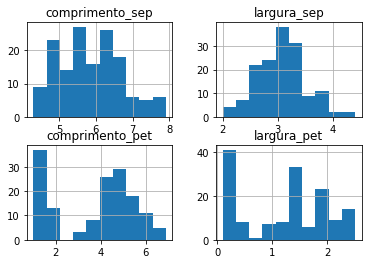

In [4]:
def show_histograms(df):
    df.hist()
show_histograms(iris)

#### 4. Mostre o histograma para cada classe de um atributo (recebido por parâmetro)

---





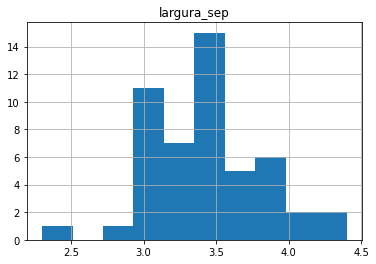

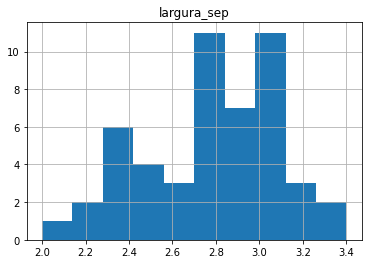

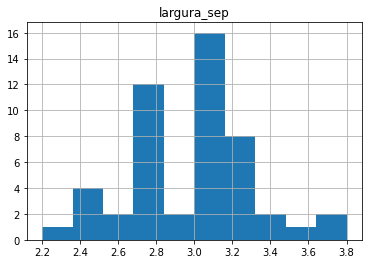

In [5]:
def show_histogram_per_class(df, attr_name):
    classes = pd.unique(iris['classe'])
    for c in classes:
        df[df.classe == c].hist(attr_name)
show_histogram_per_class(iris, 'largura_sep')

#### 5. Todas as medições foram feitas em cm, crie uma nova coluna para cada atributo com seus valores em milímetros

In [6]:
def add_mm_cols(df):
    col_names = df.columns[:-1]
    df_with_mm = df
    for c in col_names:
        df_with_mm[c + '_mm'] = df[c]*10
    return df_with_mm
add_mm_cols(iris)

,comprimento_sep,largura_sep,comprimento_pet,largura_pet,classe,comprimento_sep_mm,largura_sep_mm,comprimento_pet_mm,largura_pet_mm
0,5.1,3.5,1.4,0.2,Iris-setosa,51.0,35.0,14.0,2.0
1,4.9,3.0,1.4,0.2,Iris-setosa,49.0,30.0,14.0,2.0
2,4.7,3.2,1.3,0.2,Iris-setosa,47.0,32.0,13.0,2.0
3,4.6,3.1,1.5,0.2,Iris-setosa,46.0,31.0,15.0,2.0
4,5.0,3.6,1.4,0.2,Iris-setosa,50.0,36.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,67.0,30.0,52.0,23.0
146,6.3,2.5,5.0,1.9,Iris-virginica,63.0,25.0,50.0,19.0
147,6.5,3.0,5.2,2.0,Iris-virginica,65.0,30.0,52.0,20.0
148,6.2,3.4,5.4,2.3,Iris-virginica,62.0,34.0,54.0,23.0


### 6.  Conte o número de amostras por classe, retorne uma lista com 3 elementos com a contagem de cada classe


In [7]:
def count_samples_per_class(df):
    num_elems_class = []
    classes = pd.unique(df.classe)
    for c in classes:
        num_c = (df.classe == c).sum()
        num_elems_class.append(num_c)
    return num_elems_class
count_samples_per_class(iris)

[50, 50, 50]

#### 7. Dado um atributo, printe qual classe possui o maior e menor valor. Exemplo (não necessáriamente correto): "A classe Iris-Setosa possui a menor medição de largura de sépala."

In [8]:
def min_max(df, attr_name):
    # maximo
    idx_max = df[attr_name].idxmax()
    max_class_name = df.iloc[idx_max].classe

    # minimo
    idx_min = df[attr_name].idxmin()
    min_class_name = df.iloc[idx_min].classe

    print('A classe {} possui o maior {}'.format(max_class_name, attr_name))
    print('A classe {} possui o menor {}'.format(min_class_name, attr_name))

min_max(iris, 'largura_sep')

A classe Iris-setosa possui o maior largura_sep
A classe Iris-versicolor possui o menor largura_sep
